# <p style = "text-align:center";> Fichier de traitement des données Spotify </p>

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: okabeshu
"""
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Importer les données

In [2]:
# DataFrame des playlists
playlists_tout = pd.read_csv("/Users/okabeshu/Documents/ENSAE/Python DS/playlists.csv", encoding = "utf-8")
playlists = playlists_tout[playlists_tout["followers"] >= 300000] # Playlists gardées

# Données sur les chansons de playlists les plus suivies
spotify = pd.read_csv("/Users/okabeshu/Documents/ENSAE/Python DS/Spotify.csv")
spotify_t = spotify[spotify["tempo"] > 0]

In [3]:
train, test = train_test_split(spotify_t)
train_sauve = train.copy() # Sauvegarde de train

In [4]:
# Extraits
train.head()

,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,playlist_name,popularity,speechiness,tempo,time_signature,title,uri,valence
10520,0.6970,Wye Oak,0.567,348627,0.700,0.836000,11,0.1200,-9.325,0,Ultimate Indie,40,0.0306,99.985,3,Spiral,spotify:track:5YwOk8d2j156JfzCDgVwH8,0.534
12195,0.0178,fun.,0.672,277040,0.738,0.000068,0,0.0927,-7.045,1,Have a Great Day!,67,0.0506,107.938,4,Some Nights,spotify:track:67WTwafOMgegV6ABnBQxcE,0.392
13026,0.0155,Absofacto,0.676,212571,0.692,0.000003,3,0.0708,-6.353,1,Workday – Pop,48,0.0373,139.993,4,Light Outside,spotify:track:5GcA7cWANEAQEBZvF6QjzX,0.752
14615,0.0194,Dokken,0.298,262200,0.612,0.000097,3,0.0906,-9.002,0,80's Hard Rock,56,0.0379,156.727,4,Alone Again,spotify:track:1j06ieEC2BOCM0fTmYhn2l,0.343
4352,0.1890,Mura Masa,0.573,195467,0.531,0.000036,7,0.0901,-7.863,1,Metropolis,64,0.3860,200.404,4,What If I Go? (feat. Bonzai),spotify:track:6lbFEBQz8jYuwsDY1LYEuD,0.884


In [5]:
test.head()

,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,playlist_name,popularity,speechiness,tempo,time_signature,title,uri,valence
9809,0.991000,Angelo De Augustine,0.623,161878,0.175,0.576000,5,0.112,-12.413,1,Indie Acoustic,37,0.0334,95.371,4,"Crazy, Stoned, and Gone",spotify:track:5EFNkGBunikfNH5Sp1Mp8T,0.360
6631,0.846000,The Head and the Heart,0.548,163973,0.252,0.000938,5,0.117,-14.372,1,Winter Acoustic,57,0.0319,171.961,4,Winter Song,spotify:track:2ZhOZ06aY2yqGSA8D9jpRy,0.334
2942,0.942000,Cole King,0.776,213659,0.376,0.000909,10,0.120,-7.965,1,Soul Lounge,46,0.3450,81.956,4,Nothin Changed (feat. Tunji Ige),spotify:track:4XvQI8mXaegtrSitXoApCZ,0.550
3495,0.006140,The Presets,0.618,358125,0.921,0.149000,10,0.296,-4.728,1,Dance Hits,23,0.0536,128.004,4,Fall - Hook N Sling Remix,spotify:track:1PagOBQU02DGyhOCJ7WTY0,0.109
4501,0.000366,Chris Bekker,0.610,397997,0.992,0.826000,7,0.104,-5.054,1,transmission,36,0.0699,138.008,4,Berlinition - PvD Club Mix,spotify:track:74gm9E0Ah4e8KZ4k8is8uN,0.364


# Informations générales sur les bases de données

In [6]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12664 entries, 10520 to 8779
Data columns (total 18 columns):
acousticness        12664 non-null float64
artist              12664 non-null object
danceability        12664 non-null float64
duration_ms         12664 non-null int64
energy              12664 non-null float64
instrumentalness    12664 non-null float64
key                 12664 non-null int64
liveness            12664 non-null float64
loudness            12664 non-null float64
mode                12664 non-null int64
playlist_name       12664 non-null object
popularity          12664 non-null int64
speechiness         12664 non-null float64
tempo               12664 non-null float64
time_signature      12664 non-null int64
title               12664 non-null object
uri                 12664 non-null object
valence             12664 non-null float64
dtypes: float64(9), int64(5), object(4)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4222 entries, 98

In [7]:
# Description des variables quantitatives
train.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence
count,12664.000000,12664.000000,1.266400e+04,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000
mean,0.341289,0.575290,2.338252e+05,0.571158,0.166986,5.153111,0.168095,-9.027400,0.647189,57.115445,0.075316,118.279055,3.919694,0.429629
std,0.349095,0.170956,9.038632e+04,0.259953,0.319625,3.582140,0.134556,5.541442,0.477863,14.050206,0.079129,28.586992,0.387490,0.249265
min,0.000003,0.058000,1.965300e+04,0.000234,0.000000,0.000000,0.014500,-44.401000,0.000000,0.000000,0.022600,36.542000,1.000000,0.000000
25%,0.030600,0.469000,1.921978e+05,0.387000,0.000000,2.000000,0.093675,-10.880500,0.000000,48.000000,0.034600,96.971000,4.000000,0.224000
50%,0.189000,0.589000,2.207330e+05,0.607500,0.000168,5.000000,0.115000,-7.442000,1.000000,57.000000,0.045100,118.000500,4.000000,0.407000
75%,0.654000,0.697000,2.563330e+05,0.783000,0.083400,8.000000,0.189000,-5.350000,1.000000,66.000000,0.074600,135.177000,4.000000,0.615000
max,0.996000,0.980000,3.391040e+06,0.998000,0.993000,11.000000,0.988000,0.088000,1.000000,100.000000,0.802000,212.558000,5.000000,0.989000


In [8]:
# Description des variables qualitatives
train.describe(include = ["O"])

,artist,playlist_name,title,uri
count,12664,12664,12664,12664
unique,5337,252,9142,9977
top,Ed Sheeran,Chill Vibes,Dreamer,spotify:track:3hBBKuWJfxlIlnd9QFoC8k
freq,71,83,14,11


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e657710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f236748>]], dtype=object)

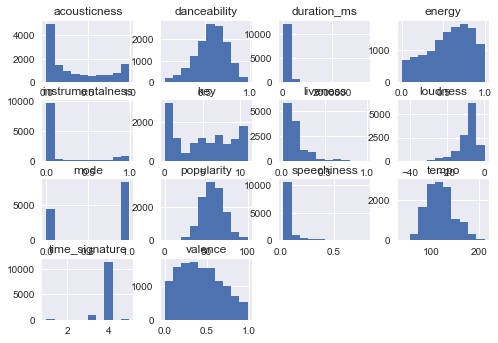

In [9]:
# Histogrammes par catégorie
train.hist()

# Étudier les doublons
Certaines chansons sont enregistrées dans plusieurs playlists. On a donc les mêmes informations musicales mais pas le même nom de playlist. Ce qui est intéressant dans ces chansons "répétées", c'est qu'elles sont souvent suffisamment populaires pour être dans plusieurs playlists différentes ; on peut donc en faire une indicatrice.

In [10]:
# Indicatrice pour les répétitions des chansons (même chanson sur des playlists différentes)
def creer_repet (donnees) : 
    data = donnees.copy()
    data["rep"] = donnees.duplicated("uri", False) # Repérer tous les doublons
    data["repet"] = 0
    data.loc[data["rep"] == True, "repet"] = 1 
    data = data.drop("rep", axis = 1)
    return data

train_r = creer_repet(train)
train_r.head()

,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,playlist_name,popularity,speechiness,tempo,time_signature,title,uri,valence,repet
10520,0.6970,Wye Oak,0.567,348627,0.700,0.836000,11,0.1200,-9.325,0,Ultimate Indie,40,0.0306,99.985,3,Spiral,spotify:track:5YwOk8d2j156JfzCDgVwH8,0.534,0
12195,0.0178,fun.,0.672,277040,0.738,0.000068,0,0.0927,-7.045,1,Have a Great Day!,67,0.0506,107.938,4,Some Nights,spotify:track:67WTwafOMgegV6ABnBQxcE,0.392,0
13026,0.0155,Absofacto,0.676,212571,0.692,0.000003,3,0.0708,-6.353,1,Workday – Pop,48,0.0373,139.993,4,Light Outside,spotify:track:5GcA7cWANEAQEBZvF6QjzX,0.752,0
14615,0.0194,Dokken,0.298,262200,0.612,0.000097,3,0.0906,-9.002,0,80's Hard Rock,56,0.0379,156.727,4,Alone Again,spotify:track:1j06ieEC2BOCM0fTmYhn2l,0.343,0
4352,0.1890,Mura Masa,0.573,195467,0.531,0.000036,7,0.0901,-7.863,1,Metropolis,64,0.3860,200.404,4,What If I Go? (feat. Bonzai),spotify:track:6lbFEBQz8jYuwsDY1LYEuD,0.884,1


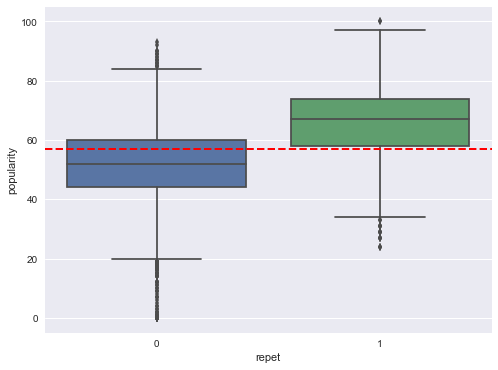

In [11]:
# Boxplot répétition et popularité
a_tester = pd.concat([train_r["popularity"], train_r["repet"]], axis = 1)
plt.subplots(figsize = (8, 6))
sns.boxplot(x = "repet", y = "popularity", data = a_tester)
plt.axhline(a_tester["popularity"].mean(), color  = "r", linestyle = "dashed", linewidth = 2)

L'intuition est bien confirmée : les chansons répétées sont plus populaires en moyenne que les autres.
Cependant, on ne peut pas supprimer les doublons des chansons répétées directement car cela nous priverait d'informations contenues dans le titre des playlists. 

# Étudier le titre des playlists

In [12]:
# Chercher les noms des playlists qui contiennent un mot en particulier
def chercher_playlist (playlists, mot) :
    titres = []
    for index, ligne in playlists.iterrows() :
        nom = ligne["playlist_name"]
        mots = nom.split(" ")
        if mot in mots :
            titres += [nom]
    return titres

# Éviter les confusions entre Classic et Classical
classic = chercher_playlist (playlists_tout, "Classic")
classical = chercher_playlist (playlists_tout, "Classical")
print("Classic :", classic, "\n \n Classical :", classical)

Classic : ['Classic Hardcore', 'Classic Honky Tonk', 'Classic Covers', 'Classic Acoustic', 'Classic Oldies Stroll', 'Classic Punk', 'Classic Soul With Seth Rogen', 'Classic Road Trip Songs'] 
 
 Classical : ['Classical New Releases: Spotify Picks', 'Winter Classical', 'Spring Classical', 'Classical Halloween', 'Top Classical of 2017', 'Classical X', 'Early Classical', 'Top Latin Classical', 'Space-themed Classical Music', 'Classical Romance', 'Jazz – Classical Crossings', 'Epic Classical', 'Classical Essentials', 'Classical Dance Music: Ballet & Beyond', 'Classical Café', 'Classical Guitar 50: Spotify Picks', "Classical Music Explained: Bernstein's Music Lectures & More", 'Next Classical', 'Classical Feast', 'Classical Intimate Dinner', 'Women of Classical', 'Contemporary Chinese Classical', 'Classical Moments in Movies', 'Top Picks Classical', 'Classical Music for Smart Kids']


Il s'agit là d'une fonction pour connaître les noms des playlists contenant un certain mot. Ici, l'exemple nous permet de savoir, en cas de doute, lequel des deux mots fait référence à la musique classique.

In [13]:
# Avoir tous les mots des titres (catégorie d'une variable)
def tous_titres (donnees, variable) : 
    mot_titres_playlists = []
    for index, ligne in donnees.iterrows() :
        nom = ligne[variable]
        mots = nom.split(" ")
        mot_titres_playlists += mots
    return mot_titres_playlists

tous_play_sans = tous_titres(playlists, "playlist_name")
#print(tous_play_sans)

## Compter les occurrences des mots dans les titres de playlists

In [14]:
# Compter les occurrences des mots sans "pondération"
compteur_mots_sans = {i : tous_play_sans.count(i) for i in set(tous_play_sans)}
#print(compteur_mots_sans)

In [15]:
# Compter les occurrences des mots avec "pondération" (nombre de chansons par playlist)
tous_mots_playlists = tous_titres(train, "playlist_name")
compteur_mots_playlists = {i : tous_mots_playlists.count(i) for i in set(tous_mots_playlists)}
#print(compteur_mots_playlists)

,occurrence
count,372.000000
mean,85.583333
std,108.130106
min,16.000000
25%,38.000000
50%,53.000000
75%,76.000000
max,780.000000


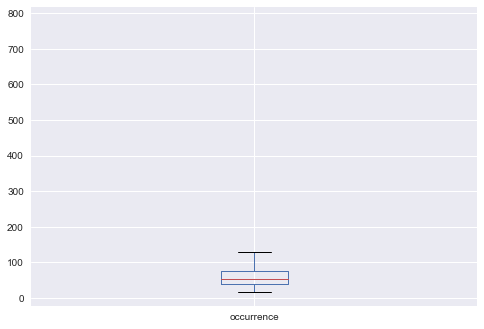

In [16]:
# Étudier les occurrences des mots dans les titres de playlists
compteur = pd.DataFrame(list(compteur_mots_playlists.items()), columns = ["mot", "occurrence"])
compteur.plot(kind = "box")
compteur.describe()

In [17]:
compteur = compteur.set_index("mot")
compteur.head()

,occurrence
mot,
Soak,74
Feels,36
'00s,28
Shovels,32
Sweet,40


In [18]:
# On supprime quelques mots vides et symboles comme of, &, ...
mots_inutiles = ["&", "|", "+", "-", "–", "of", "on", "as", "to", "in", "and", "a", "the", "The", "On", "Of", "In", "Out", "Is:", "This"]
def filtre_stop_word (occurrence, mots) : # L'index doit être les mots inutiles prédéfinis
    for X in mots :
        try :
            occurrence = occurrence.drop(X)
        except : 
            pass
    return occurrence

compt = filtre_stop_word (compteur, mots_inutiles)
compt.head()

,occurrence
mot,
Soak,74
Feels,36
'00s,28
Shovels,32
Sweet,40


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113642240>]], dtype=object)

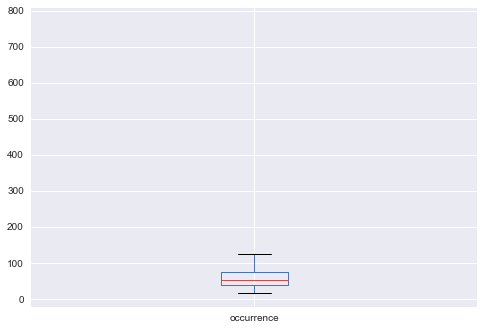

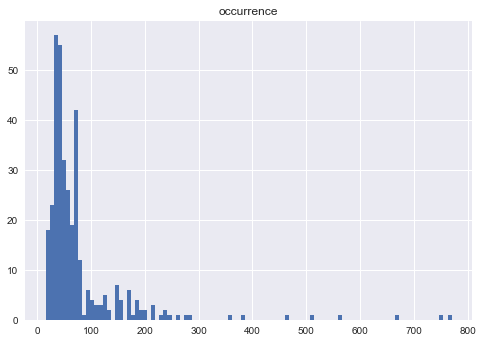

In [19]:
compt.plot(kind = "box")
compt.hist(bins = 100)

In [20]:
compt.describe()

,occurrence
count,352.000000
mean,78.150568
std,90.723666
min,16.000000
25%,38.000000
50%,52.000000
75%,74.250000
max,770.000000


In [21]:
compt.quantile(.90)

occurrence    153.8
Name: 0.9, dtype: float64

/Users/okabeshu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


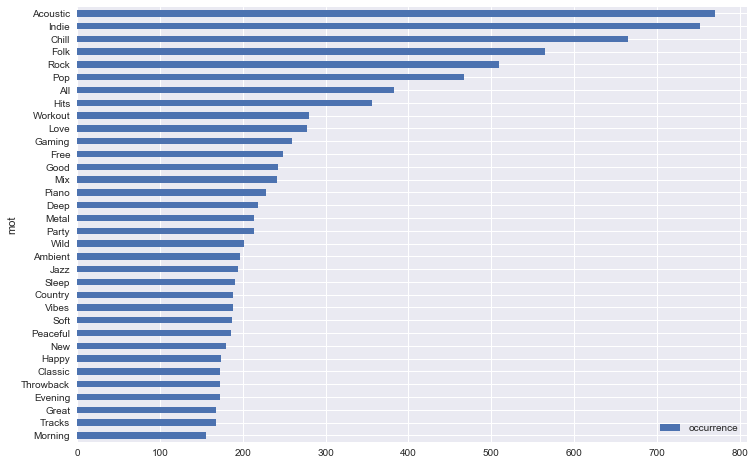

In [22]:
# Regarder les mots les plus récurrents
compt_rec = compt[(compt["occurrence"] > 155)]
compt_rec.sort_values(by = "occurrence", inplace = True)
compt_rec.plot(kind = "barh", sort_columns = True, figsize = (12, 8))

On remarque ici que les mots caractérisant les genres musicaux sont très présents dans ce classement. C'est pourquoi je vais m'intéresser à l'influence des genres musicaux sur la popularité.

## Étude des genres musicaux 

In [23]:
# Créer un tag pour le thème qui convient, ici le genre de musique
genres = ["Rock", "Metal", "Indie", "Pop", "Jazz", "Country", "Folk", "Classical"] # Liste des genres
def themes (donnees, theme, variable, new_var) : 
    data = donnees.copy()
    data[new_var] = "Aucun"
    for index, ligne in data.iterrows() :
        nom = ligne[variable]
        mots = nom.split(" ")
        for x in mots : 
            if x in theme : 
                data.at[index, new_var] = x
    return data

train_g = themes(train_r, genres, "playlist_name", "genre")
train_g.head()

,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,playlist_name,popularity,speechiness,tempo,time_signature,title,uri,valence,repet,genre
10520,0.6970,Wye Oak,0.567,348627,0.700,0.836000,11,0.1200,-9.325,0,Ultimate Indie,40,0.0306,99.985,3,Spiral,spotify:track:5YwOk8d2j156JfzCDgVwH8,0.534,0,Indie
12195,0.0178,fun.,0.672,277040,0.738,0.000068,0,0.0927,-7.045,1,Have a Great Day!,67,0.0506,107.938,4,Some Nights,spotify:track:67WTwafOMgegV6ABnBQxcE,0.392,0,Aucun
13026,0.0155,Absofacto,0.676,212571,0.692,0.000003,3,0.0708,-6.353,1,Workday – Pop,48,0.0373,139.993,4,Light Outside,spotify:track:5GcA7cWANEAQEBZvF6QjzX,0.752,0,Pop
14615,0.0194,Dokken,0.298,262200,0.612,0.000097,3,0.0906,-9.002,0,80's Hard Rock,56,0.0379,156.727,4,Alone Again,spotify:track:1j06ieEC2BOCM0fTmYhn2l,0.343,0,Rock
4352,0.1890,Mura Masa,0.573,195467,0.531,0.000036,7,0.0901,-7.863,1,Metropolis,64,0.3860,200.404,4,What If I Go? (feat. Bonzai),spotify:track:6lbFEBQz8jYuwsDY1LYEuD,0.884,1,Aucun


In [24]:
# Nettoyer la base de données grâce au genre musical
def nettoyer (donnees, genres) :
    data = themes(creer_repet(donnees), genres, "playlist_name", "genre")
    df = data.drop_duplicates(["uri", "genre"]) # Enlever les doublons
    train = df.drop(["uri", "playlist_name", "title", "artist"], axis = 1)
    train = pd.get_dummies(train)
    train = train.sort_values(by = "genre_Aucun", ascending = True) # Mettre les genre_Aucun == 1 à la fin du DataFrame
    train = train.drop("genre_Aucun", axis = 1)
    train["uri"] = df["uri"]
    train["playlist_name"] = df["playlist_name"]
    train["title"] = df["title"]
    train["artist"] = df["artist"]
    train = train.drop_duplicates(["uri"]) # Supprimer les derniers doublons
    train = train.drop(["repet", "genre_Classical", "genre_Country", "genre_Folk", "genre_Indie", 
                        "genre_Jazz", "genre_Metal", "genre_Pop", "genre_Rock"], axis = 1)
    return train

train_n = nettoyer(train, genres) # Mêmes taille que train_sauve
train_g.shape, train_n.shape

((12664, 20), (9977, 18))

In [25]:
train = themes(creer_repet(train_n), genres, "playlist_name", "genre")
train.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,uri,playlist_name,title,artist,repet,genre
10520,0.697000,0.567,348627,0.700,0.836000,11,0.120,-9.325,0,40,0.0306,99.985,3,0.534,spotify:track:5YwOk8d2j156JfzCDgVwH8,Ultimate Indie,Spiral,Wye Oak,0,Indie
14152,0.842000,0.592,238533,0.256,0.000002,4,0.088,-14.031,0,70,0.0449,76.361,4,0.103,spotify:track:1NyFRrFiJAJIaR6icj1goI,Sexy as Folk,Skinny Love,Bon Iver,0,Folk
8780,0.000779,0.431,218867,0.947,0.000253,9,0.356,-6.011,1,52,0.0752,96.539,4,0.365,spotify:track:3kubJ2b1Rad7NXZtnZAZmO,Old School Metal,Electric Eye,Judas Priest,0,Metal
12953,0.055200,0.609,288600,0.668,0.000000,7,0.167,-4.284,1,85,0.0367,80.924,4,0.811,spotify:track:3DXncPQOG4VBw3QHh3S817,Workday – Pop,I'm the One,DJ Khaled,0,Pop
14013,0.000046,0.214,246040,0.926,0.000000,0,0.124,-4.491,1,60,0.0759,171.846,4,0.369,spotify:track:77KpZmBrplD5NOYQTi3ix9,Rock the 2000s,I Stand Alone,Godsmack,0,Rock


In [26]:
train["genre"].value_counts()

Aucun        7668
Rock          461
Pop           426
Folk          379
Indie         376
Metal         192
Jazz          182
Classical     147
Country       146
Name: genre, dtype: int64

Même le genre le plus récurrent représente seulement 5% des musiques. Quel lien y a-t-il entre le genre et la popularité ?

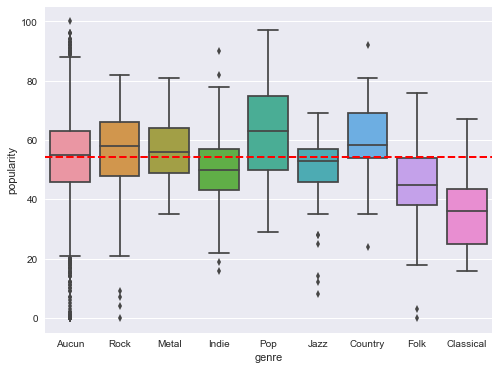

In [27]:
# Boxplot genre et popularité
a_tester = pd.concat([train["popularity"], train["genre"]], axis = 1)
plt.subplots(figsize = (8, 6))
sns.boxplot(x = "genre", y = "popularity", data = a_tester, order = ["Aucun", "Rock", "Metal", "Indie", "Pop", "Jazz", "Country", "Folk", "Classical"])
plt.axhline(a_tester["popularity"].mean(), color  = "r", linestyle = "dashed", linewidth = 2)

On remarque que :
* Le genre "Pop" est très populaire par rapport aux autres genres, ce qui est conforme aux tendances réelles.
* À l'inverse, la musique classique est très peu populaire sur Spotify.

## Étude de mots populaires

In [28]:
# Créer un tag pour les autres mots populaires
train_th = themes(train, ["Acoustic", "Chill", "Piano", "All", "Good", "Love", "Party", "Sleep", "Hits"], "playlist_name", "themes")
train_th.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,...,tempo,time_signature,valence,uri,playlist_name,title,artist,repet,genre,themes
10520,0.697000,0.567,348627,0.700,0.836000,11,0.120,-9.325,0,40,...,99.985,3,0.534,spotify:track:5YwOk8d2j156JfzCDgVwH8,Ultimate Indie,Spiral,Wye Oak,0,Indie,Aucun
14152,0.842000,0.592,238533,0.256,0.000002,4,0.088,-14.031,0,70,...,76.361,4,0.103,spotify:track:1NyFRrFiJAJIaR6icj1goI,Sexy as Folk,Skinny Love,Bon Iver,0,Folk,Aucun
8780,0.000779,0.431,218867,0.947,0.000253,9,0.356,-6.011,1,52,...,96.539,4,0.365,spotify:track:3kubJ2b1Rad7NXZtnZAZmO,Old School Metal,Electric Eye,Judas Priest,0,Metal,Aucun
12953,0.055200,0.609,288600,0.668,0.000000,7,0.167,-4.284,1,85,...,80.924,4,0.811,spotify:track:3DXncPQOG4VBw3QHh3S817,Workday – Pop,I'm the One,DJ Khaled,0,Pop,Aucun
14013,0.000046,0.214,246040,0.926,0.000000,0,0.124,-4.491,1,60,...,171.846,4,0.369,spotify:track:77KpZmBrplD5NOYQTi3ix9,Rock the 2000s,I Stand Alone,Godsmack,0,Rock,Aucun


In [29]:
train_th["themes"].value_counts()

Aucun       7610
Acoustic     511
Chill        478
All          290
Love         233
Hits         215
Piano        193
Good         168
Sleep        151
Party        128
Name: themes, dtype: int64

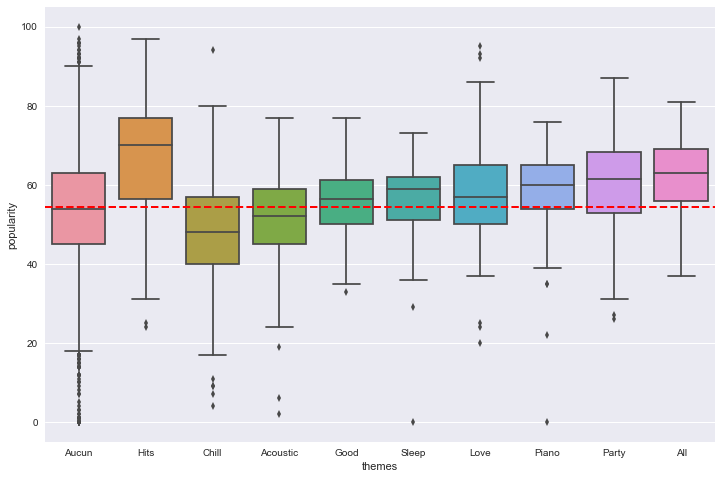

In [30]:
# Créer un boxplot entre une variable (ici, le thème) et popularité
def boxploter (donnees, variable) : 
    a_tester = pd.concat([donnees["popularity"], donnees[variable]], axis = 1)
    plt.subplots(figsize = (12, 8))
    sns.boxplot(x = variable, y = "popularity", data = a_tester)
    plt.axhline(a_tester["popularity"].mean(), color  = "r", linestyle = "dashed", linewidth = 2)
    
boxploter(train_th, "themes")

### On constate ici que :
* Les chansons considérées comme "Hits" sont bien populaires sur Spotify.
* Les chansons sur le thème de l'amour ou les chansons qualifiées de "Good" ne sont pas spécialement populaires.
* Les chansons pour s'endormir sont assez populaires en revanche. 

# Études des différentes variables

In [31]:
# Extraire les différentes catégories
acoustic = train["acousticness"]
dance = train["danceability"]
duration = train["duration_ms"]
energy = train["energy"]
instru = train["instrumentalness"]
key = train["key"]
live = train["liveness"]
loud = train["loudness"]
mode = train["mode"]
pop = train["popularity"]
speech = train["speechiness"]
tempo = train["tempo"]
time = train["time_signature"]
valence = train["valence"]

## Acousticness
Il s'agit d'une variable numérique allant de 0 à 1 indiquant la probabilité que la chanson soit acoustique. Une valeur de 1 représente une forte probabilité que la chanson est acoustique.

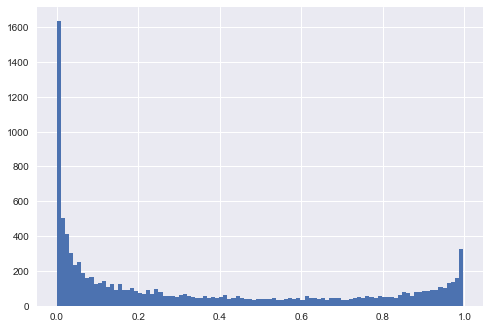

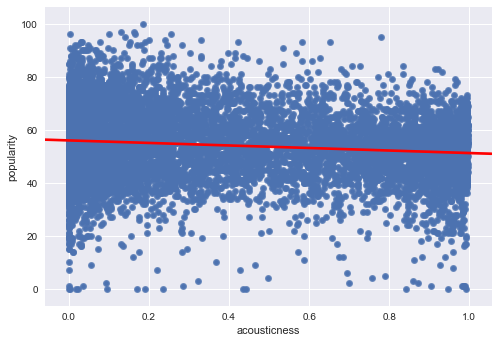

In [32]:
acoustic.hist(bins = 100)
train.plot(kind = "scatter", x = "acousticness", y = "popularity")
sns.regplot("acousticness", "popularity", data = train, fit_reg = True, line_kws = {"color": "red"})

## Danceability
Il s'agit d'une variable numérique quantifiant à quel point la chanson est adaptée à la danse. Une valeur de 1 représente une chanson très dansante. 

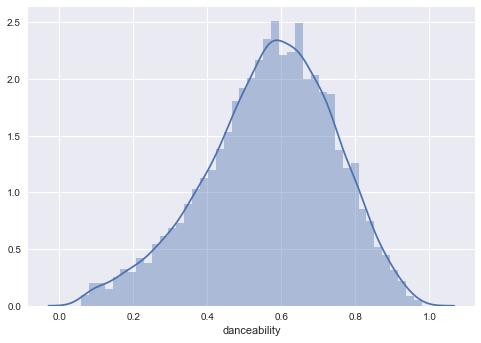

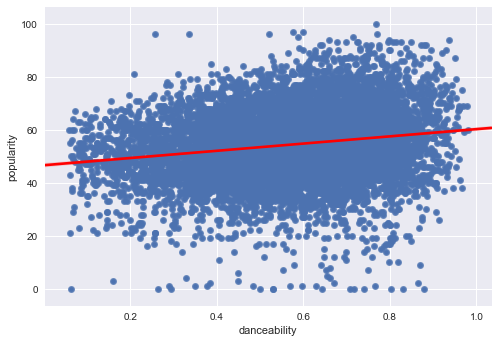

In [33]:
sns.distplot(train["danceability"])
train.plot(kind = "scatter", x = "danceability", y = "popularity")
sns.regplot("danceability", "popularity", data = train, fit_reg = True, line_kws = {"color": "red"})

On remarque qu'une chanson dansante est en moyenne plus populaire qu'une chanson qui l'est moins.

## Durée des morceaux (en ms)

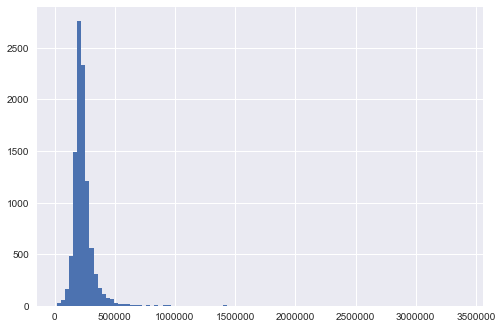

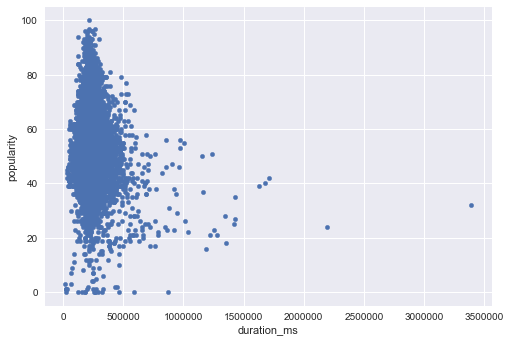

In [34]:
duration.hist(bins = 100)
train.plot(kind = "scatter", x = "duration_ms", y = "popularity")

On constate que la plupart des morceaux durent moins de 500 000 ms (moins de 9 minutes). Pour une meilleure visibilité, on peut prendre le logarithme de cette variable.

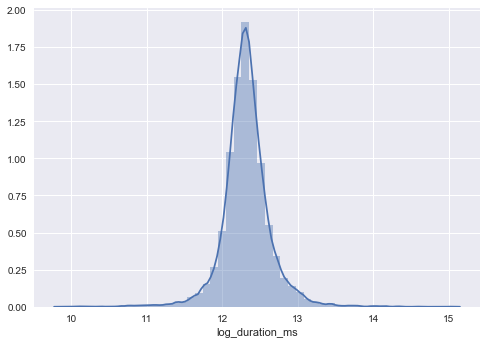

In [35]:
# On prend le logarithme 
train_l = train.copy()
train_l["log_duration_ms"] = np.log(train["duration_ms"])
sns.distplot(train_l["log_duration_ms"])

## Energy
Cette variable allant de 0 à 1 quantifie l'énergie ressentie en écoutant la musique.

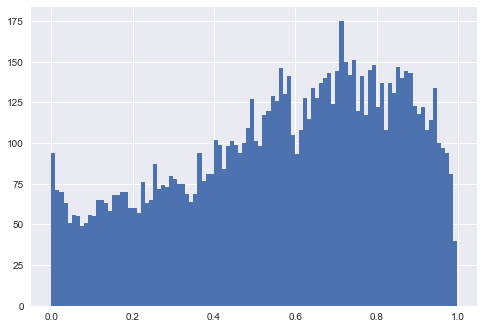

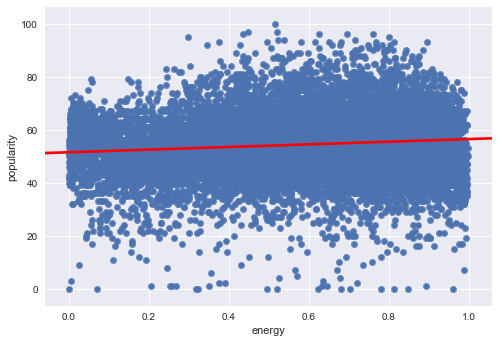

In [36]:
energy.hist(bins = 100)
train.plot(kind = "scatter", x = "energy", y = "popularity")
sns.regplot("energy", "popularity", data = train, fit_reg = True, line_kws = {"color": "red"})

## Instrumentalness
C'est une variable qui prédit si le morceau contient du chant ou non. Plus la valeur est proche de 1, plus il y a de chances qu'il n'y ait pas de chant. On considère que le morceau est purement instrumental à partir des valeurs au-dessus de 0.5, d'après la notice Spotify.

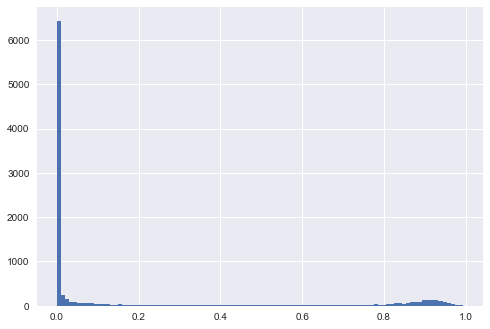

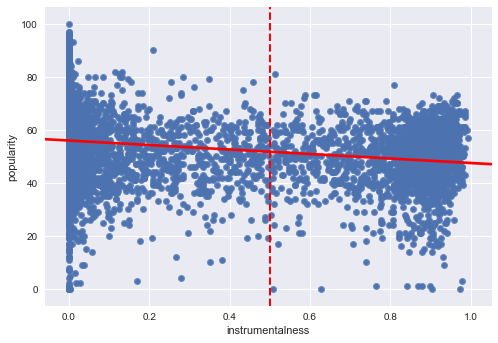

In [37]:
instru.hist(bins = 100)
train.plot(kind = "scatter", x = "instrumentalness", y = "popularity")
plt.axvline(0.5, color = "r", linestyle = "dashed", linewidth = 2) # 0.5 selon la notice pour instrumental ou non
sns.regplot("instrumentalness", "popularity", data = train, fit_reg = True, line_kws = {"color": "red"})

On note que les morceaux sans chants (ex : morceaux de musique classique) sont moins populaires en moyenne que les morceaux avec chants.

count    3549.000000
mean        0.530543
std         0.369699
min         0.010100
25%         0.103000
50%         0.658000
75%         0.890000
max         0.993000
Name: instrumentalness, dtype: float64

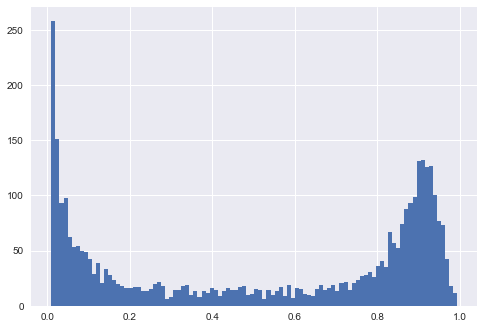

In [38]:
# Pour mieux voir sans les pics entre 0 et 0.01
instr = instru[instru > 0.01]
instr.hist(bins = 100)
instr.describe()

## Tonalité des morceaux
0 représente le do, 1 le do#, et ainsi de suite.

0     1280
7     1078
1     1011
2      938
9      923
5      883
11     768
4      751
6      712
8      689
10     605
3      339
Name: key, dtype: int64

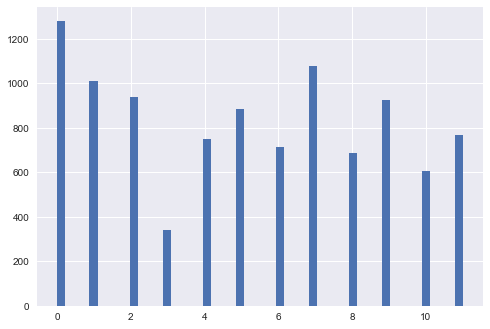

In [39]:
key.hist(bins = 50)
key.value_counts()

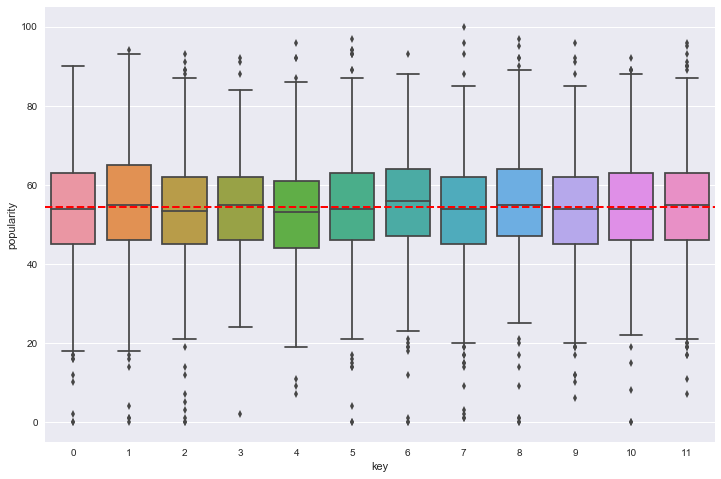

In [40]:
# Boxplot key et popularité
boxploter(train, "key")

On remarque que la tonalité du morceau n'influence que très peu sa popularité.
## Liveness
Cette variable permet de détecter si l'enregistrement du morceau s'est fait en live. Plus cette valeur est élevée, plus il y a de probabilité que la chanson ait été enregistrée en présence d'un public. Les chansons ayant des valeurs au-dessus de 0.8 en liveness sont d'ailleurs considérées comme des chansons en live.

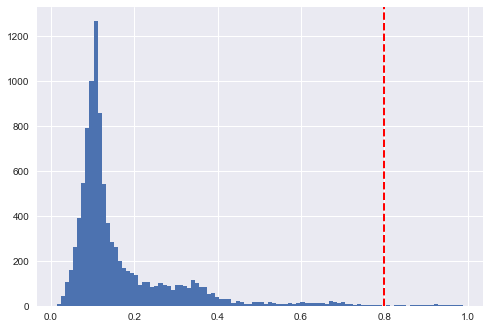

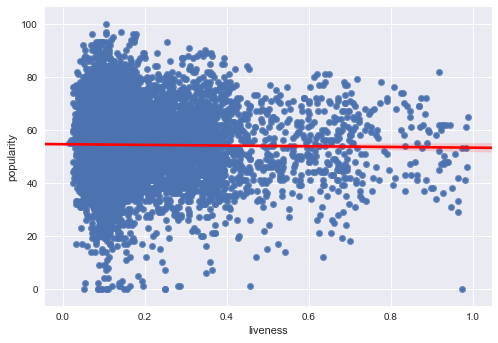

In [41]:
live.hist(bins = 100)
plt.axvline(0.8, color = "r", linestyle = "dashed", linewidth = 2) # Très probablement en live si live > 0.8
train.plot(kind = "scatter", x = "liveness", y = "popularity")
sns.regplot("liveness", "popularity", data = train, fit_reg = True, line_kws = {"color": "red"})

La plupart des chansons de la base de données semble être enregistrée sans public.
## Loudness
Il s'agit du volume global du morceau en décibels. Les valeurs vont de -60 à 0 dB.

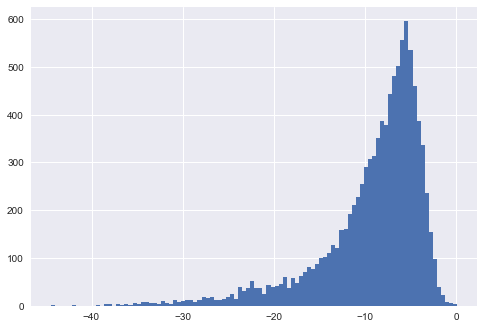

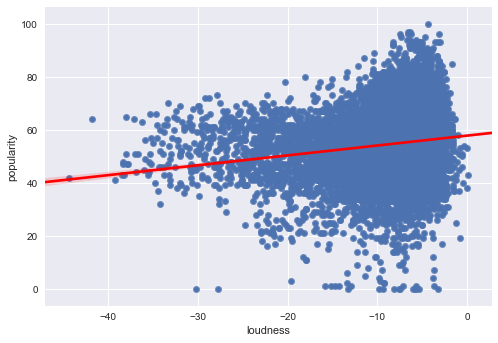

In [42]:
loud.hist(bins = 100)
train.plot(kind = "scatter", x = "loudness", y = "popularity")
sns.regplot("loudness", "popularity", data = train, fit_reg = True, line_kws = {"color": "red"})

Les utilisateurs semblent préférer des musiques plus sonores que des musiques calmes.
## Mode de la tonalité
C'est une indicatrice pour savoir si le morceau est en majeur ou non : on a donc la valeur 1 pour le mode majeur et 0 pour le mode mineur.

1    6407
0    3570
Name: mode, dtype: int64

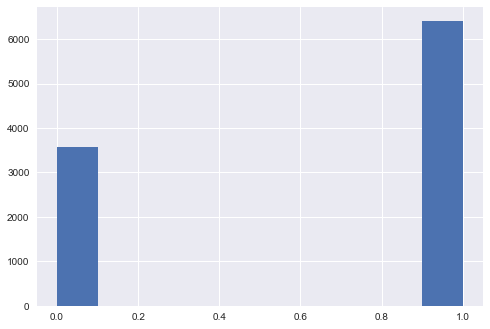

In [43]:
mode.hist()
mode.value_counts()

(Il y a presque deux fois plus de chansons en majeur que de chansons en mineur)

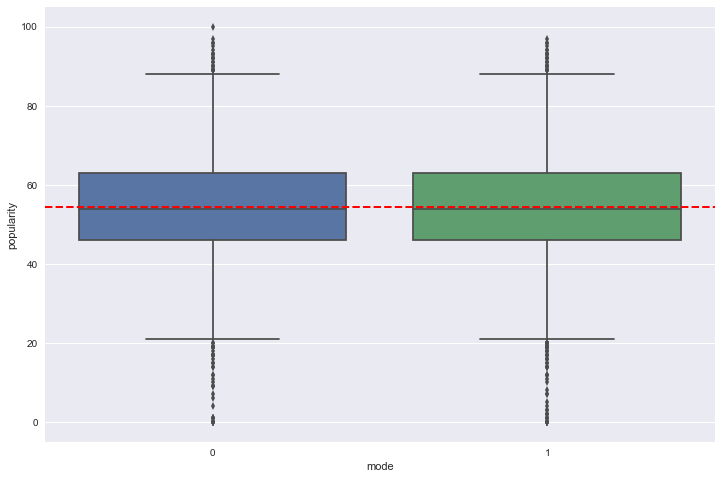

In [44]:
# Boxplot mode et popularité
boxploter(train, "mode")

Le mode de la chanson (majeur ou mineur) ne semble pas influencer la popularité de la chanson.
## Popularité
La popularité de la chanson varie de 0 à 100 et est dépend fortement du nombre total de fois que la chanson a été écoutée récemment.

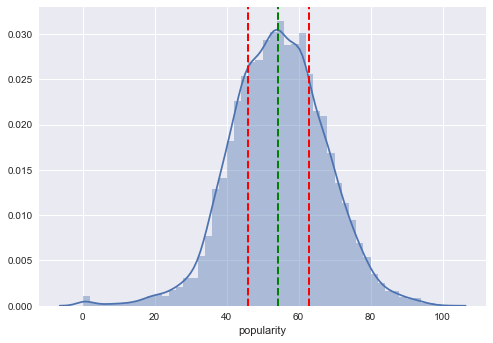

In [45]:
sns.distplot(train["popularity"])
plt.axvline(train["popularity"].quantile(0.25), color = "r", linestyle = "dashed", linewidth = 2) 
plt.axvline(train["popularity"].mean(), color = "g", linestyle = "dashed", linewidth = 2)
plt.axvline(train["popularity"].quantile(0.75), color = "r", linestyle = "dashed", linewidth = 2)

Notre échantillon collecté comporte beaucoup de chansons ayant une popularité entre 50 et 60. 
## Speechiness
Cette variable permet de détecter la présence de mots parlés dans le morceau.

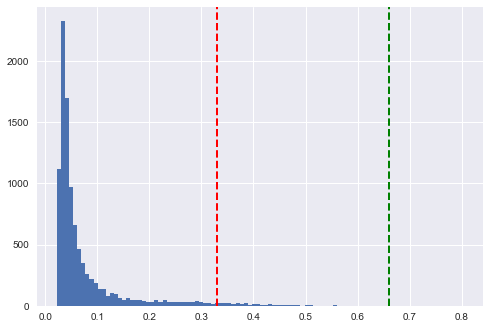

In [46]:
speech.hist(bins = 100)
plt.axvline(0.33, color = "r", linestyle = "dashed", linewidth = 2)
plt.axvline(0.66, color = "g", linestyle = "dashed", linewidth = 2)

## Tempo

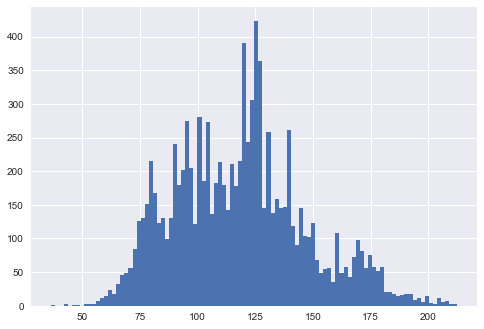

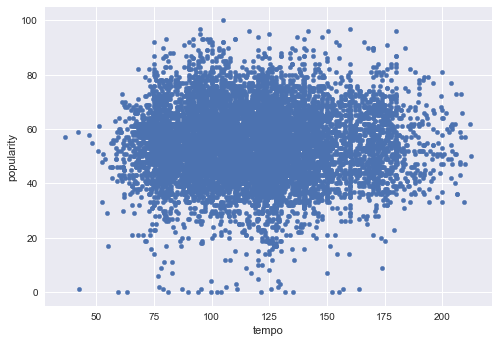

In [47]:
tempo.hist(bins = 100)
train.plot(kind = "scatter", x = "tempo", y = "popularity")

## Time signature
Il s'agit du nombre de pulsations par mesure dans la chanson.

4    8948
3     781
5     170
1      78
Name: time_signature, dtype: int64

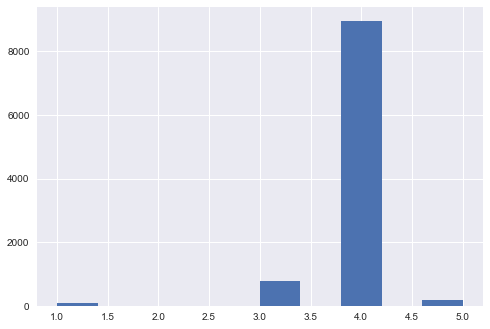

In [48]:
time.hist()
time.value_counts()

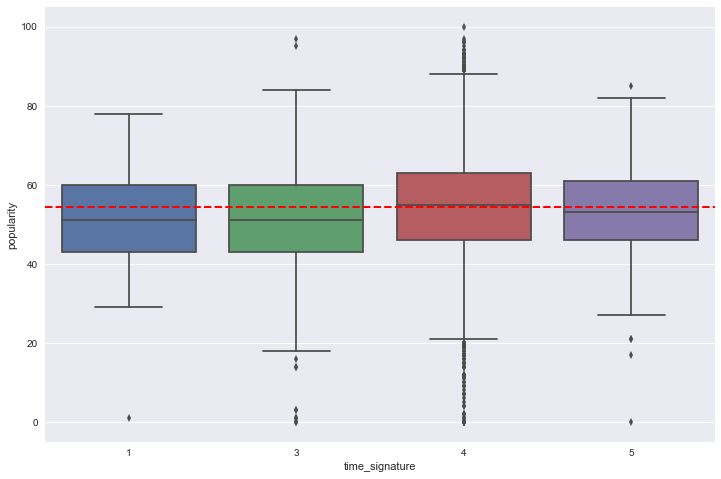

In [49]:
# Boxplot time_signature et popularité
boxploter(train, "time_signature")

## Valence
Cette variable quantifie la positivité musicale véhiculée par le morceau.

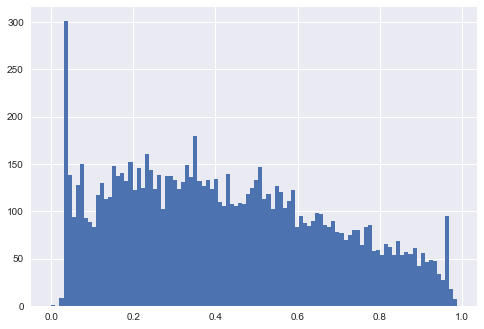

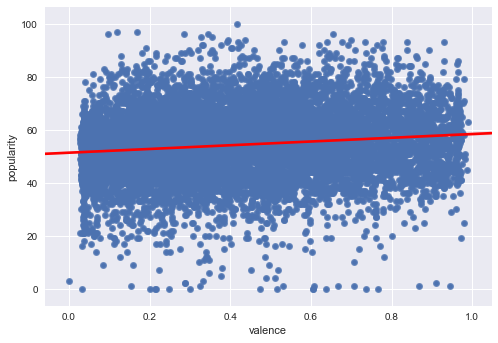

In [50]:
valence.hist(bins = 100)
train.plot(kind = "scatter", x = "valence", y = "popularity")
sns.regplot("valence", "popularity", data = train, fit_reg = True, line_kws = {"color": "red"})

# Étude des titres
En plus de l'étude des titres de playlists, on peut compléter l'analyse avec l'étude des titres en procédant de manière similaire.

In [51]:
titres = tous_titres(train, "title")
compteur_mots_titres = {i : titres.count(i) for i in set(titres)}

In [52]:
# Étudier les occurrences des mots dans les titres de chansons
compteur_t = pd.DataFrame(list(compteur_mots_titres.items()), columns = ["mot", "occurrence"])
compteur_t = compteur_t.set_index("mot")
compteur_t.describe()

,occurrence
count,8397.000000
mean,4.051804
std,23.794050
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1351.000000


In [53]:
compteur_t.quantile(0.995)

occurrence    86.06
Name: 0.995, dtype: float64

In [54]:
# Regarder les mots les plus récurrents
compt_rec_t = compteur_t[(compteur_t["occurrence"] > 97)]
compt_t = filtre_stop_word(compt_rec_t, mots_inutiles)
new_mots_inutiles = ["It", "Up", "Is", "A", "To", "For", "On", "That", "And", "for", "From", "With", "Back", "Down"]
compt_t = filtre_stop_word(compt_t, new_mots_inutiles)
compt_t.describe()

,occurrence
count,18.000000
mean,247.611111
std,154.523609
min,100.000000
25%,125.750000
50%,169.500000
75%,380.250000
max,630.000000


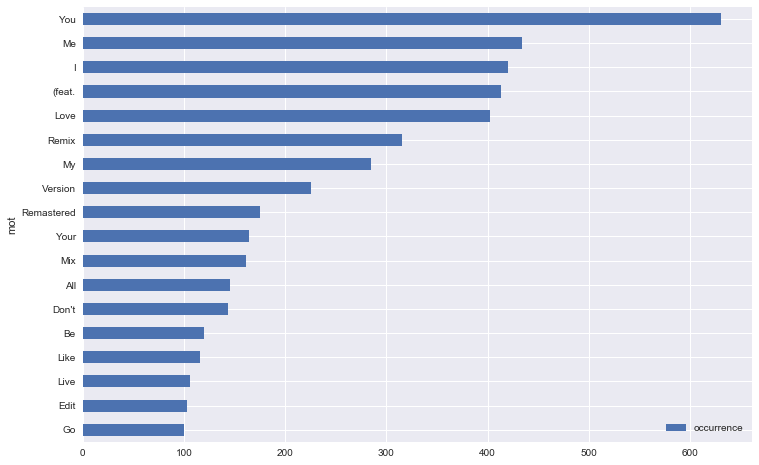

In [55]:
compt_t.sort_values(by = "occurrence", inplace = True)
compt_t.plot(kind = "barh", sort_columns = True, figsize = (12, 8))

Dans un premier temps, on étudie les mots des titres qui "catégorisent" les chansons. En effet, on remarque la présence récurrente de mots comme "feat." pour le featuring d'un artiste. Cela implique donc la présence d'un autre artiste en plus ; est-ce-que cela influence la popularité de la chanson ? De la même manière, la présence du mot "Remastered" peut être intéressante à étudier.

In [56]:
# Quelques éléments pouvant influencer la popularité d'une chanson
train_ti = themes (train, ["(feat.", "Remix", "Remastered", "Original", "Op.", "Mix", "Radio", "Version", "Edit", "Variations"], "title", "elmt_title")
train_ti["elmt_title"].value_counts()

Aucun         8621
(feat.         371
Remix          308
Version        222
Mix            157
Edit           102
Remastered      90
Op.             81
Variations      10
Radio           10
Original         5
Name: elmt_title, dtype: int64

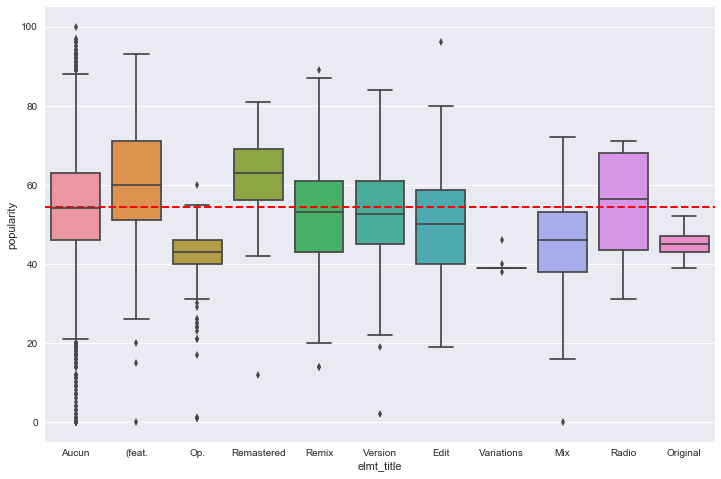

In [57]:
# Boxplot éléments du titre et popularité
boxploter(train_ti, "elmt_title")

On remarque que :
* Les featurings sont plus populaires que la moyenne. La collaboration d'artistes rendrait populaire la chanson.
* Les remastered sont des chansons souvent déjà populaires, ce qui expliquerait leur popularité.
* Le "Op." est une caractéristique des titres des œuvres classiques. On retrouve bien le fait que les morceaux classiques sont moins populaires que les autres genres sur Spotify.

On étudie maintenant les autres mots des titres. On peut donc s'intéresser à l'idée / thème général du morceau.

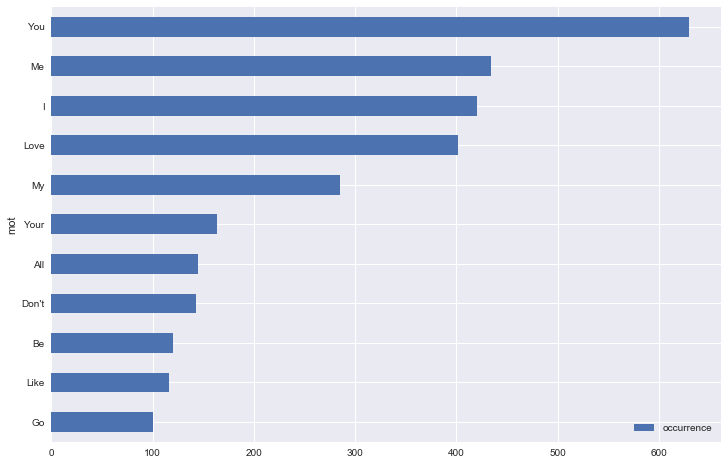

In [58]:
# Des mots fréquents qui pourraient influencer la popularité d'une chanson
mots_traites = ["(feat.", "Remix", "Remastered", "Original", "Op.", "Mix", "Radio", "Version", "Live", "Edit", "Acoustic", "Variations"]
compt_motf = filtre_stop_word(compt_t, mots_traites)

compt_motf.sort_values(by = "occurrence", inplace = True)
compt_motf.plot(kind = "barh", sort_columns = True, figsize = (12, 8))

In [59]:
train_fr = themes (train, compt_motf.index.values, "title", "fr_title")
train_fr["fr_title"].value_counts()

Aucun    7756
You       479
Me        392
Love      309
My        248
I         232
Your      136
All        99
Go         92
Be         92
Like       75
Don't      67
Name: fr_title, dtype: int64

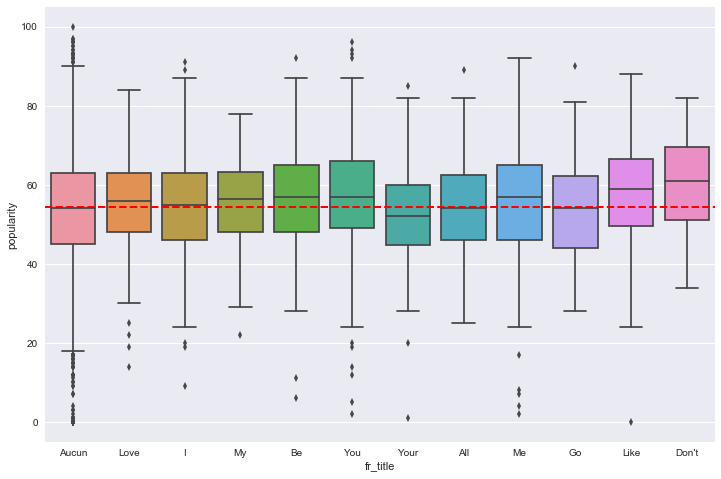

In [60]:
# Boxplot mots fréquents du titre et popularité
boxploter(train_fr, "fr_title")

On constate que :
* La négation rend plus populaire la chanson (No, Don't).
* Les verbes n'influencent pas réellement la popularité (Go, ...) sauf lorsqu'ils expriment une idée sentimentale comme Like.

# Étude des artistes
On s'intéresse maintenant à l'influence des artistes sur la popularité de leurs chansons. Est-ce-que les chanteurs cités plusieurs fois, considérés comme plus populaires que les autres, chantent réellement des chansons populaires ?

In [61]:
artist = train.groupby("artist")

# Nombre de fois que l'artiste est mentionné (doublon inclus)
train_c = artist.count()
train_a = artist.mean()
train_a["count_artist"] = train_c["key"]
train_a.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,repet,count_artist
artist,,,,,,,,,,,,,,,,
(Hed) P.E.,0.002190,0.666,240880.0,0.793000,0.000003,6.000000,0.079900,-6.028,1.000000,45.0,0.064700,96.047000,4.0,0.454,0.0,1
*NSYNC,0.020903,0.624,203200.0,0.905333,0.000353,7.666667,0.161633,-4.453,0.333333,62.0,0.051633,151.810667,4.0,0.813,0.0,3
*repeat repeat,0.042300,0.721,161537.0,0.750000,0.000000,6.000000,0.117000,-6.098,0.000000,41.0,0.037700,104.854000,4.0,0.749,0.0,1
.Sinh,0.589000,0.644,112786.0,0.258000,0.946000,7.000000,0.080700,-20.552,0.000000,52.0,0.053400,166.356000,4.0,0.207,0.0,1
03 Greedo,0.278000,0.830,238770.0,0.464000,0.000000,4.000000,0.312000,-8.375,0.000000,41.0,0.473000,172.014000,4.0,0.436,0.0,1


In [62]:
train_a.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,repet,count_artist
count,5337.000000,5337.000000,5.337000e+03,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.0,5337.000000
mean,0.353771,0.566200,2.369391e+05,0.564063,0.211082,5.190962,0.168372,-9.451801,0.636722,51.802715,0.075635,118.185523,3.913837,0.420059,0.0,1.869402
std,0.344712,0.166098,9.818692e+04,0.263611,0.340306,3.190146,0.117968,5.565750,0.434567,11.735529,0.076330,25.842177,0.352363,0.239414,0.0,2.669374
min,0.000003,0.058000,4.722700e+04,0.000879,0.000000,0.000000,0.014500,-38.243000,0.000000,0.000000,0.023600,36.542000,1.000000,0.029200,0.0,1.000000
25%,0.040100,0.465333,1.931330e+05,0.371000,0.000005,2.500000,0.098925,-11.552000,0.000000,44.000000,0.036000,99.977000,4.000000,0.227000,0.0,1.000000
50%,0.223000,0.579000,2.212130e+05,0.596778,0.002150,5.000000,0.121500,-7.925000,1.000000,52.000000,0.046700,119.002000,4.000000,0.398000,0.0,1.000000
75%,0.657000,0.683000,2.562843e+05,0.781000,0.321000,7.666667,0.202000,-5.591667,1.000000,60.000000,0.076133,132.446667,4.000000,0.591000,0.0,2.000000
max,0.996000,0.979000,2.191142e+06,0.998000,0.992000,11.000000,0.983000,0.088000,1.000000,94.000000,0.802000,212.558000,5.000000,0.981000,0.0,56.000000


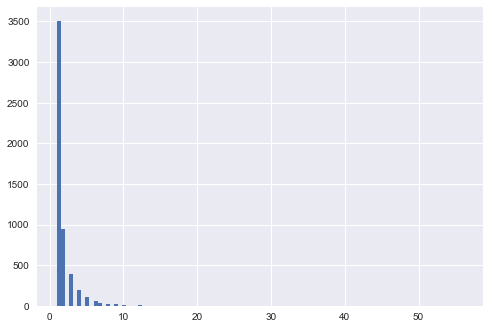

In [63]:
train_a["count_artist"].hist(bins = 100)

Étudions les artistes mentionnés plusieurs fois. J'ai choisi arbitrairement de ne garder que les artistes mentionnés au moins 20 fois.

/Users/okabeshu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


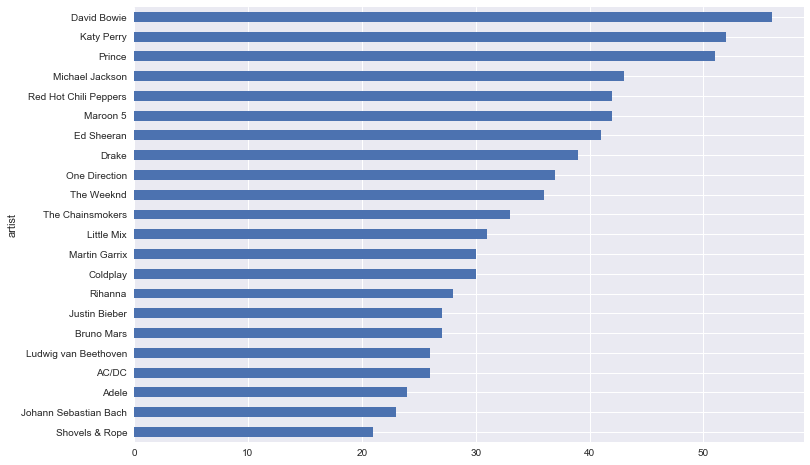

In [64]:
# Étudier les artistes mentionnés plusieurs fois
train_art = train_a.loc[train_a["count_artist"] > 20]
train_ar = train_art[["popularity", "count_artist"]]

# Classement par "occurrence"
train_ar.sort_values(by = "count_artist", inplace = True)
train_ar["count_artist"].plot(kind = "barh", sort_columns = True, figsize = (12, 8))

Les trois chanteurs les plus récurrents sont David Bowie, Prince et Katy Perry. Seront-ils les trois chanteurs les plus populaires ?

/Users/okabeshu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


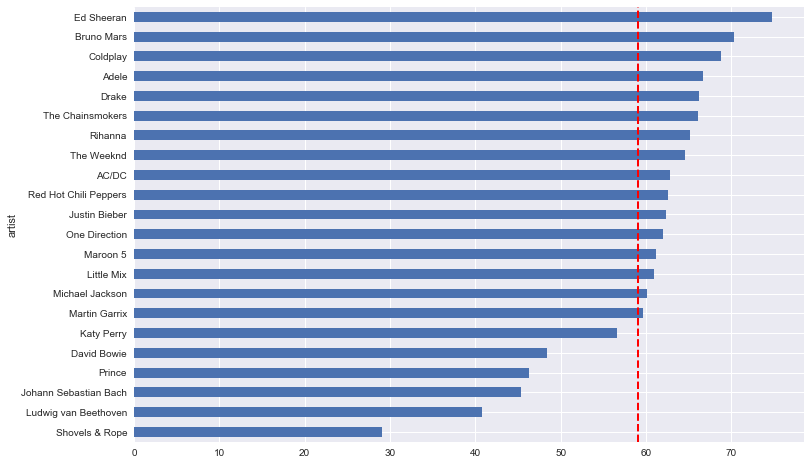

In [65]:
# Classement par popularité
train_ar.sort_values(by = "popularity", inplace = True)
train_ar["popularity"].plot(kind = "barh", sort_columns = True, figsize = (12, 8))
plt.axvline(train_ar["popularity"].mean(), color  = "r", linestyle = "dashed", linewidth = 2)

On constate ici que le fait d'être cité plusieurs fois n'est pas un gage de popularité. En effet :
* Les trois chanteurs David Bowie, Prince et Katy Perry sont cette fois associés aux chansons moins populaires que la moyenne.
* Les compositeurs classiques (Bach, Beethoven et Rachmaninoff) sont associés à des chansons très peu populaires sur Spotify, comme l'était le genre "Classical".
* La pop est populaire comme observé avec les genres : les quatre premiers artistes sont des chanteurs pop.

In [66]:
artists_compl = list(train_ar.index.values) # Tous les artistes les plus récurrents

train_ar_d = train_ar[train_ar["popularity"] > train_ar["popularity"].quantile(0.60)]
artists = list(train_ar_d.index.values) # Les artistes les plus récurrents et les plus populaires
print(artists)

['AC/DC', 'The Weeknd', 'Rihanna', 'The Chainsmokers', 'Drake', 'Adele', 'Coldplay', 'Bruno Mars', 'Ed Sheeran']


In [67]:
# Ne garder que les artistes les plus populaires parmi tous les artistes
def artiste_pop (donnees, artists) :
    data = donnees.copy()
    for index, ligne in data.iterrows() :
        artist = ligne["artist"]
        if artist not in artists : 
            data.at[index, "artist"] = "Artiste"
    return data

train_artiste = artiste_pop(train, artists)
train_artiste["artist"].value_counts()

Artiste             9693
Ed Sheeran            41
Drake                 39
The Weeknd            36
The Chainsmokers      33
Coldplay              30
Rihanna               28
Bruno Mars            27
AC/DC                 26
Adele                 24
Name: artist, dtype: int64

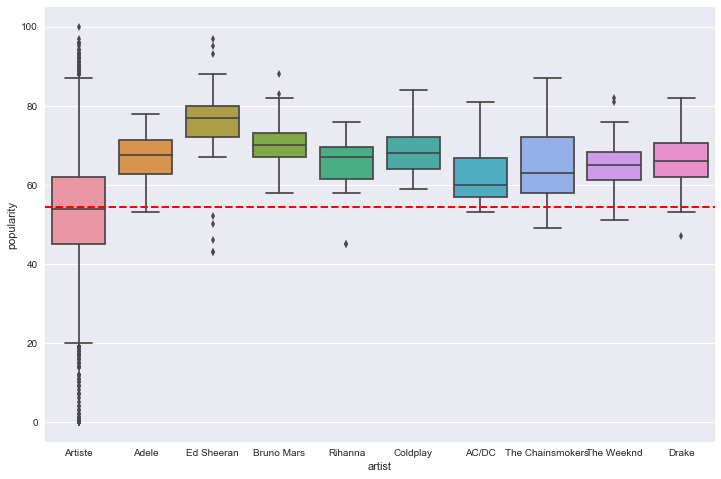

In [68]:
# Boxplot artiste populaire et popularité
boxploter(train_artiste, "artist")

In [69]:
# Essayer la même étude sur les artistes les plus récurrents
train_ar_r = train_ar[train_ar["count_artist"] > train_ar["count_artist"].quantile(0.60)]
artists_r = list(train_ar_r.index.values) # Les artistes les plus récurrents et les plus populaires
print(artists_r)

['Prince', 'David Bowie', 'Katy Perry', 'Michael Jackson', 'Maroon 5', 'One Direction', 'Red Hot Chili Peppers', 'Drake', 'Ed Sheeran']


In [70]:
train_artiste_r = artiste_pop(train, artists_r)
train_artiste_r["artist"].value_counts()

Artiste                  9574
David Bowie                56
Katy Perry                 52
Prince                     51
Michael Jackson            43
Maroon 5                   42
Red Hot Chili Peppers      42
Ed Sheeran                 41
Drake                      39
One Direction              37
Name: artist, dtype: int64

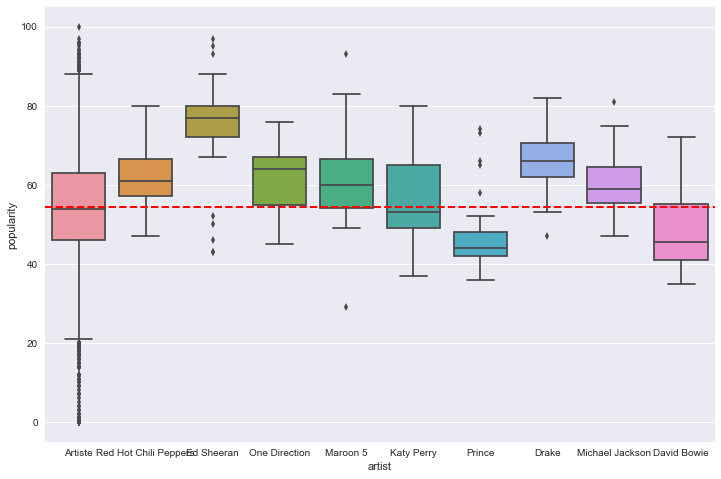

In [71]:
# Boxplot artiste populaire et popularité
boxploter(train_artiste_r, "artist")

# Matrice de corrélation

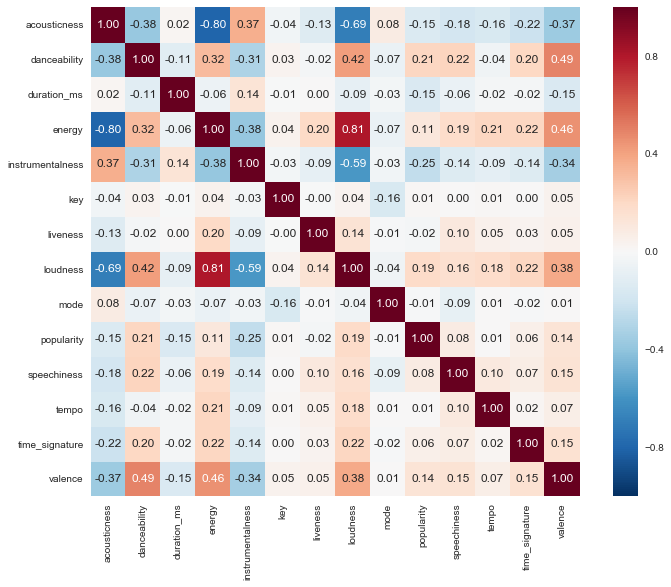

In [72]:
matrice = train_sauve.corr()
plt.subplots(figsize = (12, 9))
sns.heatmap(matrice, cbar = True, annot = True, square = True, fmt = ".2f")

# Traitement final de la base de données

In [73]:
def traiter (donnees, genres, artists) :
    data = donnees[donnees["popularity"] > 0]
    df = nettoyer(data, genres) # Supprimer les doublons
    data = themes(creer_repet(df), genres, "playlist_name", "genre") # Ajouter l'indicatrice de répétition et le genre
    data = themes(data, ["Chill", "All", "Party", "Piano", "Sleep", "Hits"], "playlist_name", "themes") # Ajouter les thèmes
    data["log_duration_ms"] = np.log(data["duration_ms"]) # Log de la durée
    df = themes(data, ["Like", "Your", "No", "Don't", "Mix", "Remastered", "(feat."], "title", "elmt_title") # Ajouter les éléments du titre
    data = df.drop(["duration_ms", "uri", "playlist_name", "title"], axis = 1)
    if len(artists) == 0 : # Traitement sans les artistes
        data = data.drop("artist", axis = 1)
        data = pd.get_dummies(data) # Créer les indicatrices
        data = data.drop(["themes_Aucun", "genre_Aucun", "elmt_title_Aucun"], axis = 1)
    else : # Traitement avec les artistes les plus récurrents
        data = artiste_pop(data, artists) # Ne garder que les artistes les plus récurrents
        data = pd.get_dummies(data)
        data = data.drop(["themes_Aucun", "genre_Aucun", "artist_Artiste", "elmt_title_Aucun"], axis = 1)
    return data

trained = traiter(train_sauve, genres, []) # Sans les artistes
trained.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,...,themes_Party,themes_Piano,themes_Sleep,elmt_title_(feat.,elmt_title_Don't,elmt_title_Like,elmt_title_Mix,elmt_title_No,elmt_title_Remastered,elmt_title_Your
10520,0.697000,0.567,0.700,0.836000,11,0.120,-9.325,0,40,0.0306,...,0,0,0,0,0,0,0,0,0,0
14152,0.842000,0.592,0.256,0.000002,4,0.088,-14.031,0,70,0.0449,...,0,0,0,0,0,0,0,0,0,0
8780,0.000779,0.431,0.947,0.000253,9,0.356,-6.011,1,52,0.0752,...,0,0,0,0,0,0,0,0,0,0
12953,0.055200,0.609,0.668,0.000000,7,0.167,-4.284,1,85,0.0367,...,0,0,0,0,0,0,0,0,0,0
14013,0.000046,0.214,0.926,0.000000,0,0.124,-4.491,1,60,0.0759,...,0,0,0,0,0,0,0,0,0,0


In [74]:
trained_art = traiter(train_sauve, genres, artists_compl) # Avec les artistes
trained_art.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,...,themes_Party,themes_Piano,themes_Sleep,elmt_title_(feat.,elmt_title_Don't,elmt_title_Like,elmt_title_Mix,elmt_title_No,elmt_title_Remastered,elmt_title_Your
10520,0.697000,0.567,0.700,0.836000,11,0.120,-9.325,0,40,0.0306,...,0,0,0,0,0,0,0,0,0,0
14152,0.842000,0.592,0.256,0.000002,4,0.088,-14.031,0,70,0.0449,...,0,0,0,0,0,0,0,0,0,0
8780,0.000779,0.431,0.947,0.000253,9,0.356,-6.011,1,52,0.0752,...,0,0,0,0,0,0,0,0,0,0
12953,0.055200,0.609,0.668,0.000000,7,0.167,-4.284,1,85,0.0367,...,0,0,0,0,0,0,0,0,0,0
14013,0.000046,0.214,0.926,0.000000,0,0.124,-4.491,1,60,0.0759,...,0,0,0,0,0,0,0,0,0,0


# <p style = "text-align:center";> Prédictions de la popularité des chansons </p>
# Prédictions sans artiste

In [75]:
tested = traiter(test, genres, [])
train_pop = trained["popularity"]
train_var = trained.drop("popularity", axis = 1)
test_var = tested.drop("popularity", axis = 1).copy()
test_pop = tested["popularity"]
train_pop.shape, train_var.shape, test_var.shape

((9964,), (9964, 35), (3833, 35))

## Régression linéaire sans artiste

In [76]:
reg = linear_model.LinearRegression()
reg.fit(train_var, train_pop)
pop_predict = reg.predict(test_var)

def coef_interpretation(variables, coef):
    dic = {}
    for i in range(len(coef)) :
        dic.update({variables[i] : coef[i]})
    return dic

coef_sans = coef_interpretation(list(train_var),reg.coef_)
sorted(coef_sans.items(), key = lambda x : x[1])

[('genre_Classical', -12.048483806441736),
 ('elmt_title_Mix', -7.1919478890909732),
 ('energy', -6.650548799481462),
 ('genre_Folk', -6.0705320472651838),
 ('instrumentalness', -5.1703009192142053),
 ('themes_Chill', -4.9304279916475373),
 ('genre_Indie', -3.6478902595466201),
 ('liveness', -2.7451803335218763),
 ('elmt_title_Your', -2.4143915261802893),
 ('acousticness', -2.0075913413344568),
 ('genre_Jazz', -1.9298757405522582),
 ('log_duration_ms', -1.2840972803207382),
 ('mode', -0.29899240031584406),
 ('tempo', -0.0062331877331782692),
 ('repet', -5.1514348342607263e-14),
 ('key', 0.0019629278505554071),
 ('loudness', 0.19897391180526536),
 ('time_signature', 0.45815746110249744),
 ('valence', 0.46382426371894248),
 ("elmt_title_Don't", 1.3123247648436667),
 ('elmt_title_Like', 1.9738255485459972),
 ('elmt_title_Remastered', 2.810933458757475),
 ('elmt_title_No', 3.1615804650549286),
 ('genre_Rock', 3.3134780374578661),
 ('genre_Metal', 3.4793126615021923),
 ('elmt_title_(feat.',

In [77]:
# Calculer le mape : Mean Absolute Percentage Error
def mape (reel, pred): 
    reel, pred = np.array(reel), np.array(pred)
    return np.mean(np.abs((reel - pred) / reel)) * 100

In [78]:
# Calcul du R^2
R2_lin_sans = reg.score(test_var, test_pop)
# Calcul de l'erreur quadratique moyenne
rmse_lin_sans = np.sqrt(mean_squared_error(test_pop, pop_predict))
# Calcul de l'erreur absolue moyenne en pourcentage
mape_lin_sans = mape(test_pop, pop_predict)
print("R2 =", R2_lin_sans, "; RMSE =", rmse_lin_sans, "; MAPE = ", mape_lin_sans)

R2 = 0.162926489316 ; RMSE = 11.9145938662 ; MAPE =  20.9620374989


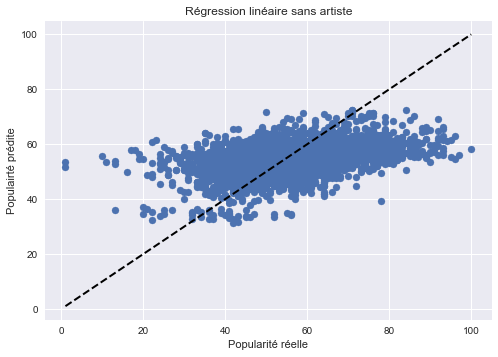

In [79]:
# Graphique
def grapher (reel, predict, titre) :
    fig, ax = plt.subplots()
    ax.scatter(reel, predict)
    ax.plot([reel.min(), reel.max()], [reel.min(), reel.max()], "k--", linewidth = 2)
    ax.set_xlabel("Popularité réelle")
    ax.set_ylabel("Populairté prédite")
    plt.title(titre)
    
grapher(test_pop, pop_predict, "Régression linéaire sans artiste")

## kNN sans artiste

In [80]:
reg = KNeighborsRegressor()
reg.fit(train_var, train_pop)
pop_predict = reg.predict(test_var)

# R^2
R2_knn_sans = reg.score(test_var, test_pop)
# Calcul de l'erreur quadratique moyenne
rmse_knn_sans = np.sqrt(mean_squared_error(test_pop, pop_predict))
# Calcul de l'erreur absolue moyenne en pourcentage
mape_knn_sans = mape(test_pop, pop_predict)
print("R2 =", R2_knn_sans, "; RMSE =", rmse_knn_sans, "; MPAE = ", mape_knn_sans)

R2 = 0.0562984975077 ; RMSE = 12.6507061166 ; MPAE =  22.8696614574


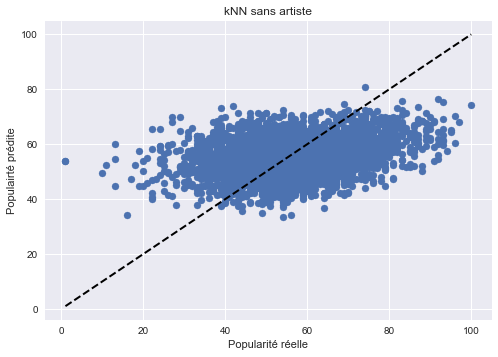

In [81]:
grapher(test_pop, pop_predict, "kNN sans artiste")

## Random Forest sans artiste

In [82]:
reg = RandomForestRegressor()
reg.fit(train_var, train_pop)
pop_predict = reg.predict(test_var)

# R^2
R2_ranfor_sans = reg.score(test_var, test_pop)
# Calcul de l'erreur quadratique moyenne
rmse_ranfor_sans = np.sqrt(mean_squared_error(test_pop, pop_predict))
# Calcul de l'erreur absolue moyenne en pourcentage
mape_ranfor_sans = mape(test_pop, pop_predict)
print("R2 =", R2_ranfor_sans, "; RMSE =", rmse_ranfor_sans, "; MAPE = ", mape_ranfor_sans)

R2 = 0.359349095031 ; RMSE = 10.4233702737 ; MAPE =  17.447961396


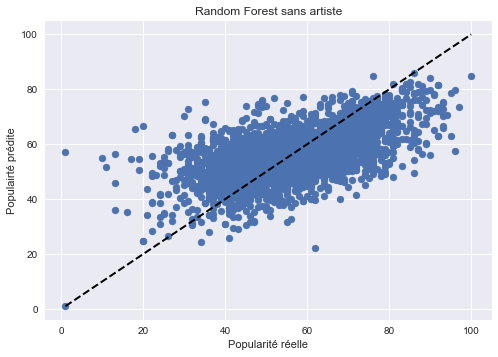

In [83]:
grapher(test_pop, pop_predict, "Random Forest sans artiste")

# Prédictions avec artistes

In [84]:
tested_art = traiter(test, genres, artists_compl)
train_pop = trained_art["popularity"]
train_var = trained_art.drop("popularity", axis = 1)
test_var = tested_art.drop("popularity", axis = 1).copy()
test_pop = tested_art["popularity"]
train_pop.shape, train_var.shape, test_var.shape

((9964,), (9964, 57), (3833, 57))

## Régression linéaire avec artistes

In [85]:
reg = linear_model.LinearRegression()
reg.fit(train_var, train_pop)
pop_predict = reg.predict(test_var)

coef_avec = coef_interpretation(list(train_var),reg.coef_)
sorted(coef_avec.items(), key = lambda x : x[1])

[('artist_Shovels & Rope', -22.660773860588709),
 ('genre_Classical', -12.028993422638184),
 ('artist_Prince', -8.7487995528716898),
 ('artist_David Bowie', -8.4380777312799751),
 ('artist_Ludwig van Beethoven', -7.433510794921883),
 ('elmt_title_Mix', -7.047540306934331),
 ('energy', -5.8622467309753006),
 ('genre_Folk', -5.692183549492194),
 ('instrumentalness', -4.9238259418734742),
 ('themes_Chill', -4.5269816993312748),
 ('genre_Indie', -3.1742260453339477),
 ('artist_Johann Sebastian Bach', -2.9781185016997509),
 ('liveness', -2.9065592902427375),
 ('elmt_title_Your', -2.1712932952258854),
 ('acousticness', -1.7939910318320478),
 ('genre_Jazz', -1.7789261213410494),
 ('log_duration_ms', -1.4995548512715753),
 ('mode', -0.14385933326135009),
 ('tempo', -0.0075579452018672555),
 ('key', -0.00177234317237418),
 ('repet', 9.4741992029412359e-12),
 ('loudness', 0.11904799539703137),
 ('time_signature', 0.42219260168161377),
 ("elmt_title_Don't", 0.78787082999401459),
 ('valence', 0.92

In [86]:
# R^2
R2_lin_avec = reg.score(test_var, test_pop)
# Calcul de l'erreur quadratique moyenne
rmse_lin_avec = np.sqrt(mean_squared_error(test_pop, pop_predict))
# Calcul de l'erreur absolue moyenne en pourcentage
mape_lin_avec = mape(test_pop, pop_predict)
print("R2 =", R2_lin_avec, "; RMSE =", rmse_lin_avec, "; MAPE = ", mape_lin_avec)

R2 = 0.202106541842 ; RMSE = 11.6324152171 ; MAPE =  20.3605114846


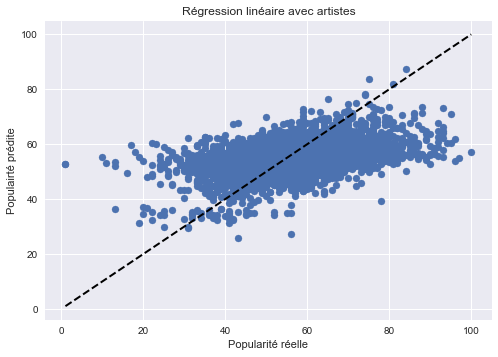

In [87]:
grapher(test_pop, pop_predict, "Régression linéaire avec artistes")

## kNN avec artistes

In [88]:
reg = KNeighborsRegressor()
reg.fit(train_var, train_pop)
pop_predict = reg.predict(test_var)
reg.get_params()

# R^2
R2_knn_avec = reg.score(test_var, test_pop)
# Calcul de l'erreur quadratique moyenne
rmse_knn_avec = np.sqrt(mean_squared_error(test_pop, pop_predict))
# Calcul de l'erreur absolue moyenne en pourcentage
mape_knn_avec = mape(test_pop, pop_predict)
print("R2 =", R2_knn_avec, "; RMSE =", rmse_knn_avec, "; MAPE = ", mape_knn_avec)

R2 = 0.0530718794719 ; RMSE = 12.6723147316 ; MAPE =  22.7790114908


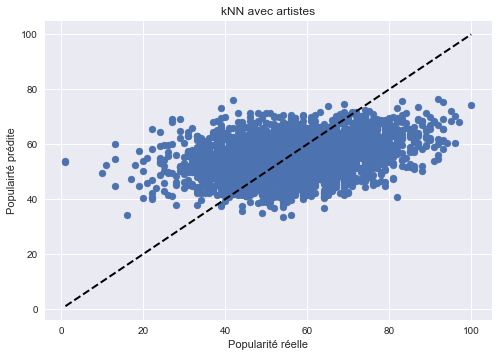

In [89]:
grapher(test_pop, pop_predict, "kNN avec artistes")

## Random Forest avec artistes

In [90]:
reg = RandomForestRegressor()
reg.fit(train_var, train_pop)
pop_predict = reg.predict(test_var)

# R^2
R2_ranfor_avec = reg.score(test_var, test_pop)
# Calcul de l'erreur quadratique moyenne
rmse_ranfor_avec = np.sqrt(mean_squared_error(test_pop, pop_predict))
# Calcul de l'erreur absolue moyenne en pourcentage
mape_ranfor_avec = mape(test_pop, pop_predict)
print("R2 =", R2_ranfor_avec, "; RMSE =", rmse_ranfor_avec, "; MAPE = ", mape_ranfor_avec)

R2 = 0.380150921282 ; RMSE = 10.25275132 ; MAPE =  17.2183632485


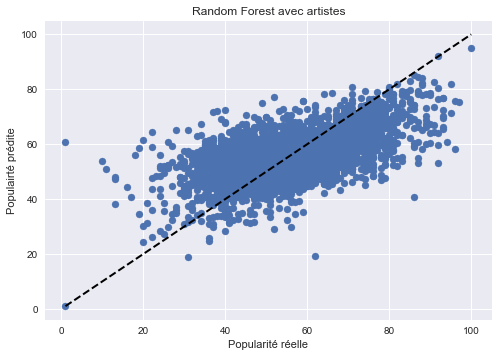

In [91]:
grapher(test_pop, pop_predict, "Random Forest avec artistes")

Graphiquement, on peut déjà constater que ce modèle semble encore une fois meilleur aux autres. Le nuage de points est plus incliné et certains points longent même la droite objectif.
# Résultats de chaque modèle

In [92]:
modeles = pd.DataFrame({
    "Model" : ["Régression linéaire sans", "kNN sans", "Random Forest sans", 
              "Régression linéaire avec", "kNN avec", "Random Forest avec"],
    "R2" : [R2_lin_sans, R2_knn_sans, R2_ranfor_sans, 
            R2_lin_avec, R2_knn_avec, R2_ranfor_avec],
    "RMSE" : [rmse_lin_sans, rmse_knn_sans, rmse_ranfor_sans,
             rmse_lin_avec, rmse_knn_avec, rmse_ranfor_avec],
    "MAPE" : [mape_lin_sans, mape_knn_sans, mape_ranfor_sans,
             mape_lin_avec, mape_knn_avec, mape_ranfor_avec]})
modeles = modeles[["Model", "R2", "RMSE", "MAPE"]]
modeles.sort_values(by = "R2", ascending = False)

,Model,R2,RMSE,MAPE
5,Random Forest avec,0.380151,10.252751,17.218363
2,Random Forest sans,0.359349,10.423370,17.447961
3,Régression linéaire avec,0.202107,11.632415,20.360511
0,Régression linéaire sans,0.162926,11.914594,20.962037
1,kNN sans,0.056298,12.650706,22.869661
4,kNN avec,0.053072,12.672315,22.779011


# Étude de la popularité des chansons dans le tableau test

In [93]:
df = nettoyer(test, genres)
df = df[df["popularity"] > 0]
df["pred"] = pop_predict # Ajouter les prédictions
test_top = df[["title", "artist", "popularity", "pred"]]
test_top.head()

,title,artist,popularity,pred
9809,"Crazy, Stoned, and Gone",Angelo De Augustine,37,59.7
6436,King of Spain,The Tallest Man On Earth,56,47.1
12356,8 Seconds,Molly DeWolf,35,28.3
13031,Weak,AJR,76,52.0
13388,Darling,Real Estate,67,30.8


In [94]:
# Les chansons réeellement populaires
test_top.sort_values(by = "popularity", ascending = False).head(10)

,title,artist,popularity,pred
9377,Havana,Camila Cabello,100,61.6
11078,rockstar,Post Malone,97,54.3
11508,Silence,Marshmello,96,67.1
16024,New Rules,Dua Lipa,96,57.4
16820,Wolves,Selena Gomez,95,42.7
788,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,95,69.7
16046,Let You Down,NF,94,54.7
44,Too Good At Goodbyes,Sam Smith,93,60.6
9339,What Lovers Do (feat. SZA),Maroon 5,93,72.1
311,Sensualidad,Bad Bunny,93,60.9


In [95]:
# Les chansons populaires selon les prédictions
test_top.sort_values(by = "pred", ascending = False).head(10)

,title,artist,popularity,pred
15254,Someone Like You,Adele,78,95.2
4728,Whole Heart - Dave Winnel Remix,Gryffin,47,92.0
5896,Hold Tight,The Sweeplings,41,85.2
1241,Burning Man,watt,59,84.6
4019,Pressing Matters - Robag's Pinvoldex Sull NB,The Cyclist,39,84.2
4801,O Superman - Original,M.A.N.D.Y.,30,83.0
7684,True,Spandau Ballet,64,82.6
12456,Pockets,Easy Life,50,82.2
1406,Tell Me Tell Me,courtship.,61,82.0
9628,Yellow,Coldplay,80,81.8


On constate que le Top 10 est totalement différent. On peut en effet remarquer d'une part que pour les chansons réellement populaires, leur popularité prédite se situe entre 50 et 70, donc dans la moyenne. D'autre part, pour les chansons qui sont dans le Top 10 selon l'algorithme, on trouve aussi bien des chansons peu populaires (popularité inférieure au premier quartile) que des chansons réellement populaires (popularité supérieure au troisième quartile).

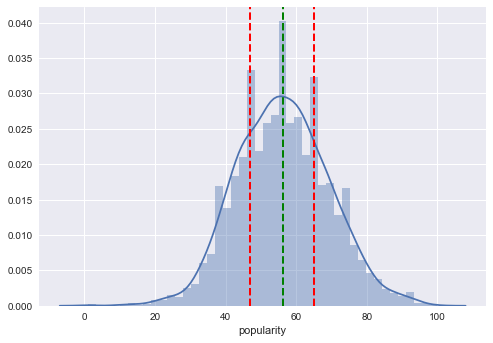

In [96]:
# Distribution réelle de la popularité
sns.distplot(test_top["popularity"])
plt.axvline(test_top["popularity"].quantile(0.25), color = "r", linestyle = "dashed", linewidth = 2) 
plt.axvline(test_top["popularity"].mean(), color = "g", linestyle = "dashed", linewidth = 2)
plt.axvline(test_top["popularity"].quantile(0.75), color = "r", linestyle = "dashed", linewidth = 2)

In [97]:
# Kurtosis
print("Kurtosis :", test_top["popularity"].kurt())
# Écart interquartile
print("Écart interquartile :", test_top["popularity"].quantile(0.75) - test_top["popularity"].quantile(0.25))

Kurtosis : 0.136876056824
Écart interquartile : 18.0


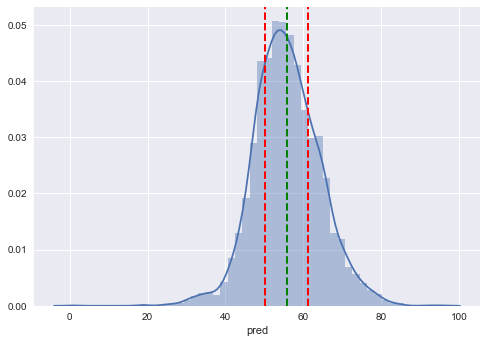

In [98]:
# Distribution prédite de la popularité
sns.distplot(test_top["pred"])
plt.axvline(test_top["pred"].quantile(0.25), color = "r", linestyle = "dashed", linewidth = 2) 
plt.axvline(test_top["pred"].mean(), color = "g", linestyle = "dashed", linewidth = 2)
plt.axvline(test_top["pred"].quantile(0.75), color = "r", linestyle = "dashed", linewidth = 2)

In [99]:
# Kurtosis
print("Kurtosis :", test_top["pred"].kurt())
# Écart interquartile
print("Écart interquartile :", test_top["pred"].quantile(0.75) - test_top["pred"].quantile(0.25))

Kurtosis : 1.10075653464
Écart interquartile : 11.0


On peut donc réaffirmer ici que le modèle semble bien prédire les valeurs moyennes mais qu'il a du mal avec les chansons très populaires ou trop peu populaires (les valeurs extrêmes). L'algorithme tend en effet à prédire des popularités moyennes pour la plupart des chansons. On remarque d'ailleurs que le graphique pour les popularités prédites est bien plus pointu que pour les popularités réelles.
# Top 10 des chansons de la base initiale (à titre informatif)

In [100]:
df = nettoyer(spotify_t, genres)
df = df[df["popularity"] > 0]
ess1 = df[["title", "artist", "popularity"]]
ess1.head()

,title,artist,popularity
12432,Là-haut,L'Impératrice,48
3259,Lucky,Jason Mraz,75
3260,Lay Me Down,Sam Smith,74
3262,This Town,Niall Horan,70
3263,Fix You,Coldplay,81


In [101]:
# Les chansons réeellement populaires dans la base initiale
ess1.sort_values(by = "popularity", ascending = False).head(10)

,title,artist,popularity
8888,Havana,Camila Cabello,100
3196,Perfect,Ed Sheeran,97
16064,rockstar,Post Malone,97
45,Silence,Marshmello,96
12663,Dusk Till Dawn - Radio Edit,ZAYN,96
9570,All I Want for Christmas Is You,Mariah Carey,96
16024,New Rules,Dua Lipa,96
16027,Wolves,Selena Gomez,95
16031,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,95
16046,Let You Down,NF,94
